# Projet : Analyse des données des passagers du Titanic

### Objectif du projet :

+ Charger un dataset public.
+ Nettoyer les données (valeurs manquantes, doublons).
+ Explorer les données pour répondre à des questions :
   + Quel pourcentage de passagers ont survécu ?
   + Quel groupe (âge, sexe, classe) avait le taux de survie le plus élevé ?
+ Visualiser les résultats.

#### 1: Chargement du dataset

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lien vers le CSV
csv_url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

# Charger le dataset
df = pd.read_csv(csv_url)

# Créer une colonne pour les groupes d'âge
df['AgeGroup'] = pd.cut(
    df['Age'], 
    bins=[0, 17, 64, float('inf')], 
    labels=['Enfants', 'Adultes', 'Personnes âgées']
)

# Afficher les premières lignes
print("Premières lignes du dataset :")
print(df.head())

# Afficher un résumé statistique
print("\nRésumé statistique :")
print(df.describe())

# Vérifier les valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())

Premières lignes du dataset :
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked AgeGroup  
0      0         A/5 21171   7.2500   NaN        S  Adultes  
1      0          PC 17599  71.2833   C85        C  Adultes  
2      0  STON/O2. 3101282   7.9250   NaN        S  Adultes  
3      0            113803  53.1000  C123 

#### 2 : Nettoyage des données

In [17]:
# Remplacer les valeurs manquantes pour l'âge par la médiane
df['Age'].fillna(df['Age'].median())

# Supprimer les lignes avec des valeurs manquantes dans 'Embarked'
df.dropna(subset=['Embarked'], inplace=True)

# Vérifier les modifications
print("\nRésumé des données après nettoyage :")
print(df.info())



Résumé des données après nettoyage :
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    int64   
 2   Pclass       889 non-null    int64   
 3   Name         889 non-null    object  
 4   Sex          889 non-null    object  
 5   Age          712 non-null    float64 
 6   SibSp        889 non-null    int64   
 7   Parch        889 non-null    int64   
 8   Ticket       889 non-null    object  
 9   Fare         889 non-null    float64 
 10  Cabin        202 non-null    object  
 11  Embarked     889 non-null    object  
 12  AgeGroup     712 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 91.3+ KB
None


#### 3 : Analyse descriptive 

In [21]:
# Pourcentage de survie
survival_rate = df['Survived'].mean() * 100
print(f"\nPourcentage de passagers ayant survécu : {survival_rate:.2f}%")

# Taux de survie par sexe
survival_by_sex = df.groupby('Sex')['Survived'].mean() * 100
print("\nTaux de survie par sexe :")
print(survival_by_sex)

# Taux de survie par classe
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
print("\nTaux de survie par classe :")
print(survival_by_class)

# Taux de survie par âge
survival_by_age_group = df.groupby('AgeGroup', observed=False)['Survived'].mean() * 100
print("\nTaux de survie par groupe d'âge :")
print(survival_by_age_group)



Pourcentage de passagers ayant survécu : 38.25%

Taux de survie par sexe :
Sex
female    74.038462
male      18.890815
Name: Survived, dtype: float64

Taux de survie par classe :
Pclass
1    62.616822
2    47.282609
3    24.236253
Name: Survived, dtype: float64

Taux de survie par groupe d'âge :
AgeGroup
Enfants            53.982301
Adultes            38.435374
Personnes âgées     9.090909
Name: Survived, dtype: float64


#### 3 : Visualisations

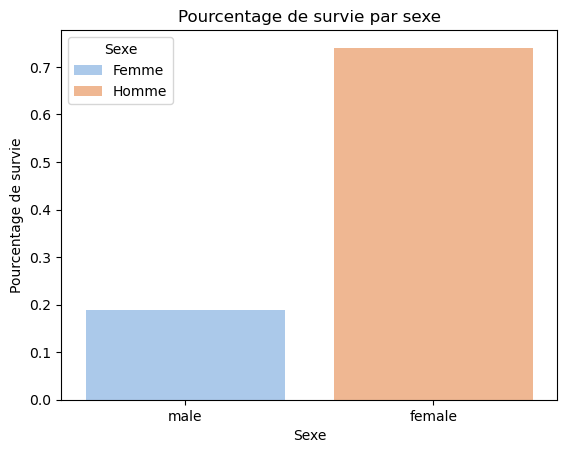

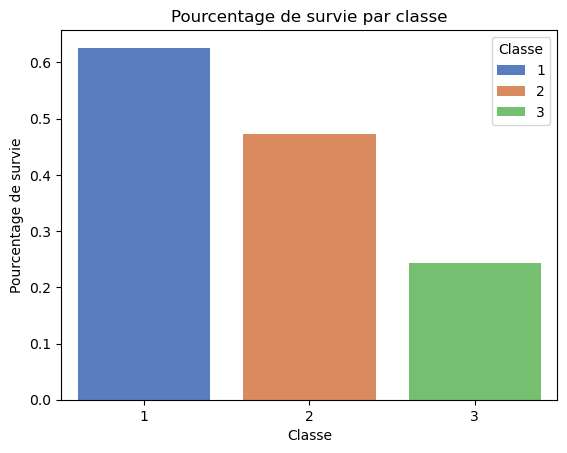

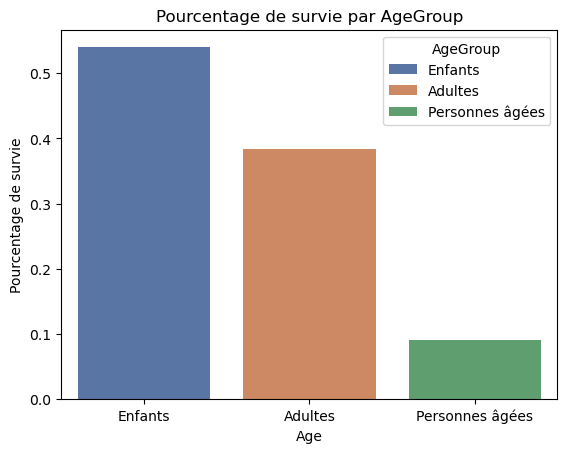

In [27]:
# Graphique de survie par sexe
sns.barplot(data=df, x='Sex', y='Survived', hue='Sex', palette='pastel', estimator=lambda x: sum(x) / len(x), errorbar=None)
plt.title('Pourcentage de survie par sexe')
plt.ylabel('Pourcentage de survie')
plt.xlabel('Sexe')
plt.legend(title='Sexe', labels=['Femme', 'Homme'])  # Ajoute des labels manuellement
plt.show()




# Graphique de survie par classe
sns.barplot(data=df, x='Pclass', y='Survived', hue='Pclass', palette='muted', estimator=lambda x: sum(x) / len(x), errorbar=None)
plt.title('Pourcentage de survie par classe')
plt.ylabel('Pourcentage de survie')
plt.xlabel('Classe')
plt.legend(title='Classe')
plt.show()

# Graphique de survie par âge
sns.barplot(data=df, x='AgeGroup', y='Survived', hue='AgeGroup', palette='deep', estimator=lambda x: sum(x) / len(x), errorbar=None)
plt.title('Pourcentage de survie par AgeGroup')
plt.ylabel('Pourcentage de survie')
plt.xlabel('Age')
plt.legend(title='AgeGroup')
plt.show()



In [34]:
# Sauvegarder le DataFrame nettoyé
df.to_csv('cleaned_titanic_data.csv', index=False)
print("\nDonnées nettoyées sauvegardées dans 'cleaned_titanic_data.csv'")



Données nettoyées sauvegardées dans 'cleaned_titanic_data.csv'
